In [1]:
import pandas as pd
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/4 COURSE/7 DIBIMBING/Sociolla/sociolla_clean.csv")
df.head()

,Brand,Name,Rating,Review,Harga_Diskon,Harga_Asli
0,Maybelline,Superstay Vinyl Ink Tint,4.7,5000,139900,139900
1,Skintific,Perfect Stay Velvet Matte Cushion,4.8,758,140700,168840
2,Dear Me Beauty,Serum Lip Tint,4.6,4300,35280,40670
3,Skintific,Ultra Cover Powder Foundation,4.8,294,124050,148860
4,barenbliss,Peach Makes Perfect Lip Tint,4.6,5800,65610,72900


In [3]:
# SQL Query: Jumlah produk per-brand
query1 = """
SELECT Brand, COUNT(*) AS Jumlah
FROM df
GROUP BY Brand
ORDER BY Jumlah DESC
LIMIT 20
"""
jumlah_produk_brand = ps.sqldf(query1, locals())
print(jumlah_produk_brand)

                    Brand  Jumlah
0               Make Over      64
1               Focallure      60
2              BLP Beauty      56
3                  Wardah      54
4                   Elise      54
5              Lavie Lash      50
6        Jacquelle Beaute      44
7                   Emina      42
8                    ESQA      42
9           Holika Holika      41
10             Maybelline      38
11           Rose All Day      35
12               Luxcrime      35
13                 Espoir      31
14  Artisan Professionnel      31
15             barenbliss      28
16   Buttonscarves Beauty      27
17            Blink Charm      27
18              PinkFlash      26
19               Mercredi      25


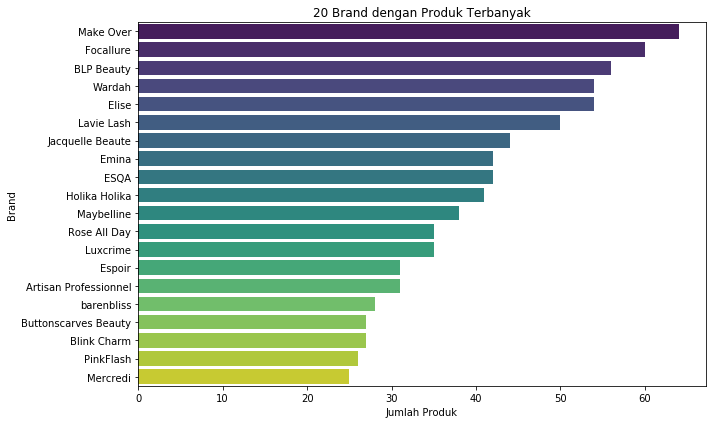

In [4]:
# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x="Jumlah", y = "Brand", data = jumlah_produk_brand, palette = "viridis")
plt.title("20 Brand dengan Produk Terbanyak")
plt.xlabel("Jumlah Produk")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [5]:
df['Review'] = df['Review'].replace("No Review", 0).astype(int)

In [6]:
# SQL Query: Total Review per Brand
query2 = """
SELECT Brand, SUM(Review) AS Jumlah_Review
FROM df
GROUP BY Brand
ORDER BY Jumlah_Review DESC
LIMIT 20
"""
jumlah_review_brand = ps.sqldf(query2, locals())
print(jumlah_review_brand)

               Brand  Jumlah_Review
0             Wardah          67434
1              Emina          63139
2         Maybelline          51594
3               ESQA          44033
4          Make Over          42914
5       Rose All Day          22014
6         BLP Beauty          20196
7    Mother of Pearl          16974
8         barenbliss          16010
9   Jacquelle Beaute           9930
10    Dear Me Beauty           8686
11      Loreal Paris           7717
12         Skintific           7221
13             Goban           6216
14     Holika Holika           5717
15     Studio Tropik           5443
16         Focallure           4616
17        YOU Beauty           4428
18        Sea Makeup           3261
19           Azarine           3180


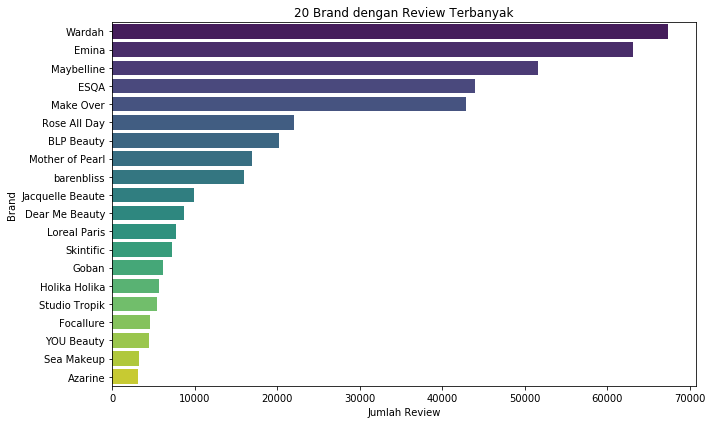

In [7]:
# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x="Jumlah_Review", y = "Brand", data = jumlah_review_brand, palette = "viridis")
plt.title("20 Brand dengan Review Terbanyak")
plt.xlabel("Jumlah Review")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [8]:
# SQL Query: Jumlah Produk dari brand yang memiliki Rating diatas 4.7
query3 = """
SELECT Brand, COUNT(*) AS Jumlah_Produk_Rating_47plus
FROM df
WHERE Rating >= 4.7
GROUP BY Brand
ORDER BY Jumlah_Produk_Rating_47plus DESC
LIMIT 20
"""
hasil_rating47 = ps.sqldf(query3, locals())
print(hasil_rating47)


                    Brand  Jumlah_Produk_Rating_47plus
0                   Elise                           53
1        Jacquelle Beaute                           42
2              Lavie Lash                           33
3              BLP Beauty                           31
4                    ESQA                           29
5                  Espoir                           27
6             Blink Charm                           26
7    Buttonscarves Beauty                           25
8                Luxcrime                           24
9   Artisan Professionnel                           23
10             barenbliss                           22
11             Maybelline                           22
12               Mercredi                           21
13           Rose All Day                           20
14               YVENETIC                           19
15              Skintific                           19
16              Make Over                           19
17        

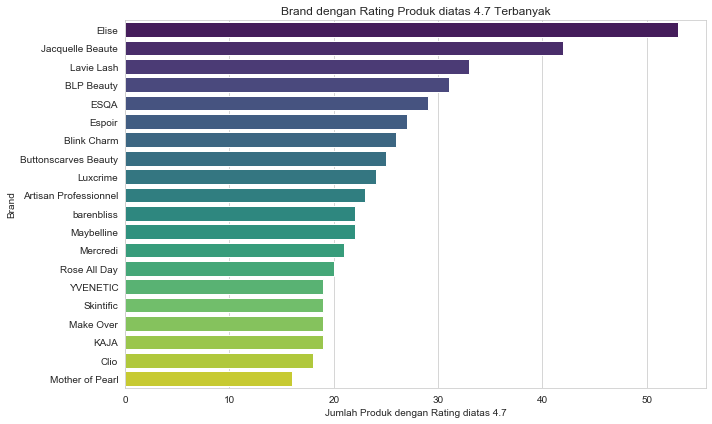

In [21]:
# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x="Jumlah_Produk_Rating_47plus", y = "Brand", data = hasil_rating47, palette = "viridis")
plt.title("Brand dengan Rating Produk diatas 4.7 Terbanyak")
plt.xlabel("Jumlah Produk dengan Rating diatas 4.7")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [9]:
# Review to Product Ratio per Brand
# Melihat engagement per produk
# Membedakan brand dengan banyak produk tapi kurang menarik vs brand dengan produk yang benar-benar diperhatikan pelanggan.

query4 = """
SELECT
    Brand,
    SUM(Review) AS Total_Review,
    COUNT(*) AS Jumlah_Produk,
    ROUND(1.0 * SUM(Review) / COUNT(*), 2) AS Review_to_Product_Ratio
FROM df
GROUP BY Brand
ORDER BY Review_to_Product_Ratio DESC
LIMIT 20
"""

avg_rating_df = ps.sqldf(query4, locals())
print(avg_rating_df)

              Brand  Total_Review  Jumlah_Produk  Review_to_Product_Ratio
0             Emina         63139             42                  1503.31
1        Maybelline         51594             38                  1357.74
2            Wardah         67434             54                  1248.78
3            Pond's          1200              1                  1200.00
4              ESQA         44033             42                  1048.40
5   Mother of Pearl         16974             21                   808.29
6         Make Over         42914             64                   670.53
7      Rose All Day         22014             35                   628.97
8        barenbliss         16010             28                   571.79
9      Loreal Paris          7717             15                   514.47
10          Carasun          2937              6                   489.50
11   Dear Me Beauty          8686             19                   457.16
12    Studio Tropik          5443     

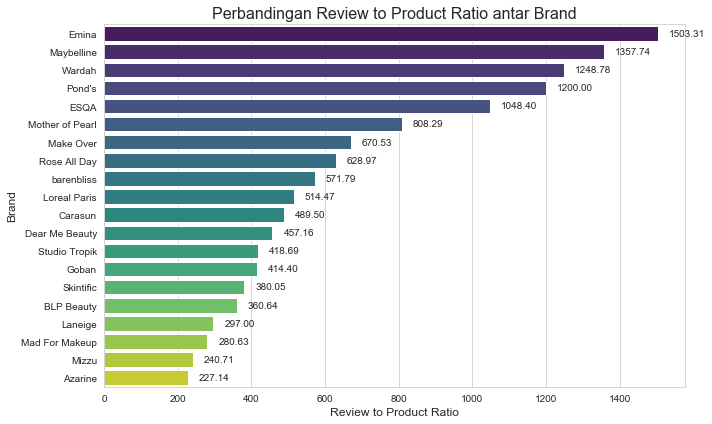

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat bar chart horizontal 
sns.set_style("whitegrid")
ax = sns.barplot(x='Review_to_Product_Ratio', y='Brand', data=avg_rating_df, palette='viridis')

plt.title('Perbandingan Review to Product Ratio antar Brand', fontsize=16)
plt.xlabel('Review to Product Ratio', fontsize=12)
plt.ylabel('Brand', fontsize=12)

# Menambahkan nilai di setiap bar untuk mempermudah pembacaan
for i, v in enumerate(avg_rating_df['Review_to_Product_Ratio']):
    ax.text(v + 30, i, f'{v:.2f}', va='center')

plt.tight_layout()
plt.show()

In [12]:
query5 = """
SELECT Brand, SUM(Review) AS Total_Review, ROUND(AVG(Rating), 2) AS Average_Rating
FROM df
GROUP BY Brand
ORDER BY Total_Review DESC
LIMIT 20
"""
hasil_avg_rating = ps.sqldf(query5, locals())
print(hasil_avg_rating)

               Brand  Total_Review  Average_Rating
0             Wardah         67434            4.36
1              Emina         63139            4.33
2         Maybelline         51594            4.17
3               ESQA         44033            3.34
4          Make Over         42914            4.35
5       Rose All Day         22014            4.13
6         BLP Beauty         20196            3.06
7    Mother of Pearl         16974            4.68
8         barenbliss         16010            4.22
9   Jacquelle Beaute          9930            3.19
10    Dear Me Beauty          8686            2.43
11      Loreal Paris          7717            4.65
12         Skintific          7221            2.53
13             Goban          6216            3.38
14     Holika Holika          5717            4.39
15     Studio Tropik          5443            2.89
16         Focallure          4616            4.51
17        YOU Beauty          4428            4.59
18        Sea Makeup          3

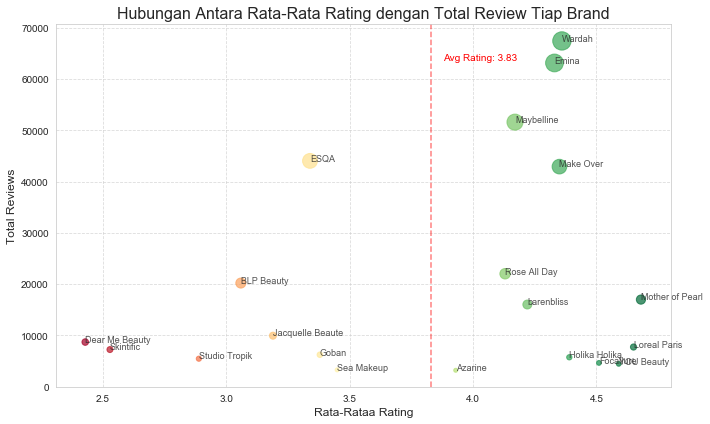

In [17]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Membuat scatter plot dengan ukuran titik berdasarkan Total_Review
plt.scatter(
    hasil_avg_rating['Average_Rating'], 
    hasil_avg_rating['Total_Review'],
    s=hasil_avg_rating['Total_Review']/200,  # Ukuran titik proporsional dengan Total_Review
    c=hasil_avg_rating['Average_Rating'],    # Warna berdasarkan Average_Rating
    cmap='RdYlGn',                          # Red-Yellow-Green colormap
    alpha=0.7
)

# Menambahkan garis rata-rata rating
plt.axvline(x=hasil_avg_rating['Average_Rating'].mean(), color='red', linestyle='--', alpha=0.5)
plt.text(hasil_avg_rating['Average_Rating'].mean()+0.05, plt.gca().get_ylim()[1]*0.9, 
         f'Avg Rating: {hasil_avg_rating["Average_Rating"].mean():.2f}', 
         color='red', fontsize=10)

# Menambahkan label brand pada setiap titik
for i, row in hasil_avg_rating.iterrows():
    plt.annotate(row['Brand'], 
                (row['Average_Rating'], row['Total_Review']),
                fontsize=9, alpha=0.8)

plt.title('Hubungan Antara Rata-Rata Rating dengan Total Review Tiap Brand', fontsize=16)
plt.xlabel('Rata-Rataa Rating', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()